# Cycle Data Prediction of distance by using Linear regression

***Declaration ***: The central idea and coding  is abstract  from Kevin mark ham youtube video seriese, Introduction to machine learning with scikit-learn video series. You can find link under resources section.  

****Note:****The Miles which is applied in this analysis were the idea of distance over time. It is only an approximation to prove the premise that ‘we could predict the distance by using time’. The calculated miles were obtained by utilising of time ad detail formula is explained in underneath. The actual mileage by bicycle ride depends on too many factors such as age, velocity of the trip, size of tyres, weight of the person etc. The information is not as accurate as real-world approximation, but it is almost good enough to perform the desired job. 


------------------------------------------------------------

***Formula:***

Cycle distance between Elliott Ave seattle,wa and Westlake Ave N,seattle,wa

Time		distance
14 min 		1.6 mi

Cycle distance between Harvard Ave,seattle,wa and E Pine St,seattle,wa

Time		distance
8 min 		0.8 mi

Cycle distance between E Pine St,seattle,wa and Union St,seattle,wa

Time		distance
13 min 		1.9 mi

Mean time= 14+8+13/3 = 11.66

Mean distance in mile = 1.6+0.08+1.9/3 =1.43

Distance covered in miles over period of time = Mean time/ Mean distance in mile 

Distance covered in miles over period of time = 11.66/1.43 = 8.15

Distance travel = Tripduration_minutes / 8.15

----------------------------------------------------------

***Question *** colud we predict distance in miles by using time?

***Question ***  what are the other factor that effect on result when we  predict distanc in miles by using time?

-------------------------------------------------------

What are the **features**?

- Time: A trip duration in minutes

- Age: An Age of a rider   
    
- Sex_num: Gender of Rider Male = 1 and Female 2.
    
- Month: Which month trip took place
    
- tripduration: Total trip duration in second.
    

What is the **response**?
- Miles: A trip distance measured in miles.

# Libraries

In [1]:
import os,csv,io,mapsplotlib,time,folium,googlemaps,geopy,zipfile,requests,warnings
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import mysql.connector as sql
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVC
import numpy as np
warnings.simplefilter('ignore')

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

C:\Users\mrferozi\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('drop view pridict_time_vw')
db_cursor.execute('create view pridict_time_vw as select *,tripduration_minutes Time,round((tripduration_minutes/8.15),2) Miles from trip_clean order by to_station_id;')

In [7]:
db_cursor.execute('select * from pridict_time_vw')
table_rows = db_cursor.fetchall()
data = pd.read_sql('select * from pridict_time_vw', con=db_connection)
bikes = pd.DataFrame(data)
bikes.head()

,﻿Sno,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,...,Day_num,sthours,stphours,tripduration_minutes,age,bmonth,tdate,year,Time,Miles
0,20347,25228,2015-01-01,2015-01-01,SEA00056,474.824,E Pine St,Broad St,CBD-13,BT-01,...,4,15,15,7.91,49,1,2015-01-01,2015,7.91,0.97
1,20468,25357,2015-01-02,2015-01-02,SEA00356,330.987,Westlake Ave & 6th Ave,Broad St,SLU-15,BT-01,...,0,14,14,5.52,34,1,2015-01-02,2015,5.52,0.68
2,20592,25495,2015-01-03,2015-01-03,SEA00433,1714.041,Columbia St,Broad St,FH-01,BT-01,...,2,12,13,28.57,34,1,2015-01-03,2015,28.57,3.51
3,20738,25659,2015-01-04,2015-01-04,SEA00138,779.303,E Denny Way,Broad St,CH-06,BT-01,...,3,21,21,12.99,27,1,2015-01-04,2015,12.99,1.59
4,20760,25683,2015-01-05,2015-01-05,SEA00358,725.026,Dexter Ave N & Aloha St,Broad St,SLU-02,BT-01,...,1,8,8,12.08,34,1,2015-01-05,2015,12.08,1.48


## Visualizing the data

In [8]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

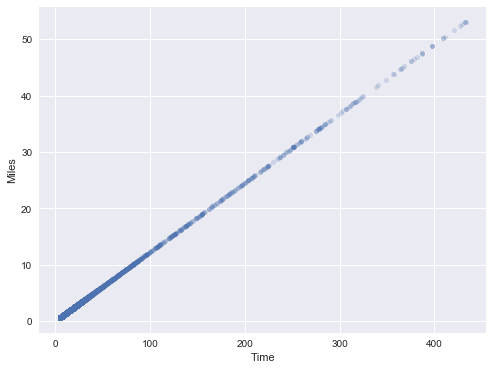

In [9]:
# Pandas scatter plot
bikes.plot(kind='scatter', x='Time', y='Miles', alpha=0.2)

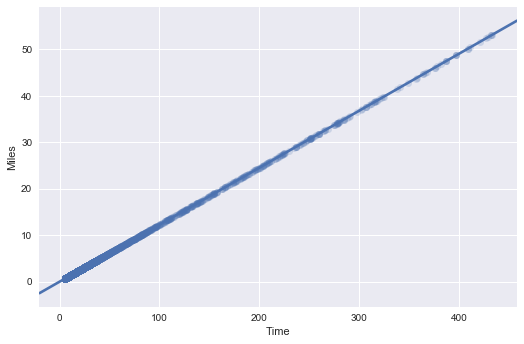

In [10]:
# Seaborn scatter plot with regression line
sns.lmplot(x='Time', y='Miles', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

## Building a linear regression model

In [11]:
# create X and y
feature_cols = ['Time']
X = bikes[feature_cols]
y = bikes.Miles

In [12]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

5.92459893811e-06
[ 0.12269972]


## Using the model for prediction

How many miles a bike will travell if continiouse paddel for 25 minutes?

In [14]:
# manually calculate the prediction
linreg.intercept_ + linreg.coef_*25

array([ 3.06749895])

In [15]:
# convert 25 minutes into Seconds
25 * 60

1500

In [17]:
bikes['Travel_time_in_sec'] = bikes['Time'] * 60
bikes.head()

,﻿Sno,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,...,sthours,stphours,tripduration_minutes,age,bmonth,tdate,year,Time,Miles,Travel_time_in_sec
0,20347,25228,2015-01-01,2015-01-01,SEA00056,474.824,E Pine St,Broad St,CBD-13,BT-01,...,15,15,7.91,49,1,2015-01-01,2015,7.91,0.97,474.6
1,20468,25357,2015-01-02,2015-01-02,SEA00356,330.987,Westlake Ave & 6th Ave,Broad St,SLU-15,BT-01,...,14,14,5.52,34,1,2015-01-02,2015,5.52,0.68,331.2
2,20592,25495,2015-01-03,2015-01-03,SEA00433,1714.041,Columbia St,Broad St,FH-01,BT-01,...,12,13,28.57,34,1,2015-01-03,2015,28.57,3.51,1714.2
3,20738,25659,2015-01-04,2015-01-04,SEA00138,779.303,E Denny Way,Broad St,CH-06,BT-01,...,21,21,12.99,27,1,2015-01-04,2015,12.99,1.59,779.4
4,20760,25683,2015-01-05,2015-01-05,SEA00358,725.026,Dexter Ave N & Aloha St,Broad St,SLU-02,BT-01,...,8,8,12.08,34,1,2015-01-05,2015,12.08,1.48,724.8


In [18]:
# use the predict method
linreg.predict(25)

array([ 3.06749895])

The model predict that  a bike will travell if continiouse paddel for 25 minutes will covered ***3.067 miles***

## Explore more features

In [19]:
# explore more features
feature_cols = ['tripduration', 'Time']

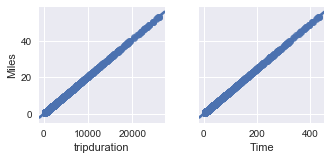

In [20]:
# multiple scatter plots in Seaborn
sns.pairplot(bikes, x_vars=feature_cols, y_vars='Miles', kind='reg')

,﻿Sno,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,...,sthours,stphours,tripduration_minutes,age,bmonth,tdate,year,Time,Miles,Travel_time_in_sec
0,20347,25228,2015-01-01,2015-01-01,SEA00056,474.824,E Pine St,Broad St,CBD-13,BT-01,...,15,15,7.91,49,1,2015-01-01,2015,7.91,0.97,474.6
1,20468,25357,2015-01-02,2015-01-02,SEA00356,330.987,Westlake Ave & 6th Ave,Broad St,SLU-15,BT-01,...,14,14,5.52,34,1,2015-01-02,2015,5.52,0.68,331.2
2,20592,25495,2015-01-03,2015-01-03,SEA00433,1714.041,Columbia St,Broad St,FH-01,BT-01,...,12,13,28.57,34,1,2015-01-03,2015,28.57,3.51,1714.2
3,20738,25659,2015-01-04,2015-01-04,SEA00138,779.303,E Denny Way,Broad St,CH-06,BT-01,...,21,21,12.99,27,1,2015-01-04,2015,12.99,1.59,779.4
4,20760,25683,2015-01-05,2015-01-05,SEA00358,725.026,Dexter Ave N & Aloha St,Broad St,SLU-02,BT-01,...,8,8,12.08,34,1,2015-01-05,2015,12.08,1.48,724.8


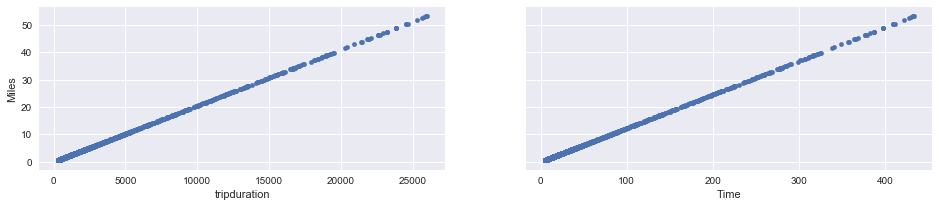

In [21]:
# multiple scatter plots in Pandas
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='Miles', ax=axs[index], figsize=(16, 3))
bikes.head()

In [22]:
# cross-tabulation of season and month
pd.crosstab(bikes.Time, bikes.Miles)

Miles,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,...,47.43,47.45,48.73,50.2,50.44,51.66,52.38,52.66,53.04,53.11
Time,,,,,,,,,,,,,,,,,,,,,
5.00,79,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.01,126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.02,0,137,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.03,0,170,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.04,0,122,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.05,0,140,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.06,0,161,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.07,0,139,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.08,0,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


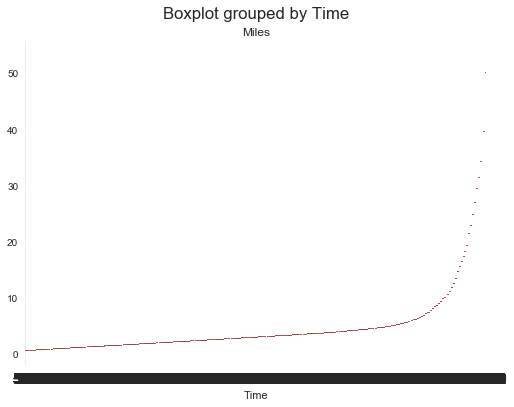

In [23]:
# box plot of rentals, grouped by season
bikes.boxplot(column='Miles', by='Time')

In [25]:
# correlation matrix (ranges from 1 to -1)
bikes.corr()

,﻿Sno,trip_id,tripduration,birthyear,Sex_num,from_station_id_num,to_station_id_num,Day_num,sthours,stphours,tripduration_minutes,age,bmonth,year,Time,Miles,Travel_time_in_sec
﻿Sno,1.000000,0.978773,0.001409,0.047470,-0.013806,0.018554,0.032934,0.004804,-0.024748,-0.025127,0.001410,-0.047470,0.527126,0.745400,0.001410,0.001410,0.001410
trip_id,0.978773,1.000000,-0.000087,0.048124,-0.014682,0.018038,0.033254,0.005735,-0.025561,-0.026024,-0.000085,-0.048124,0.499674,0.791462,-0.000085,-0.000084,-0.000085
tripduration,0.001409,-0.000087,1.000000,-0.047913,0.064242,0.059949,0.039727,-0.010661,0.031775,0.066964,1.000000,0.047913,0.003840,-0.000851,1.000000,0.999998,1.000000
birthyear,0.047470,0.048124,-0.047913,1.000000,-0.056289,0.017517,0.052244,-0.010259,0.014471,0.009713,-0.047913,-1.000000,0.032445,0.031347,-0.047913,-0.047912,-0.047913
Sex_num,-0.013806,-0.014682,0.064242,-0.056289,1.000000,0.013298,0.024187,-0.003164,-0.002649,0.000817,0.064243,0.056289,-0.017147,-0.002926,0.064243,0.064242,0.064243
from_station_id_num,0.018554,0.018038,0.059949,0.017517,0.013298,1.000000,0.205072,0.005161,0.112247,0.114421,0.059948,-0.017517,0.004159,0.021788,0.059948,0.059950,0.059948
to_station_id_num,0.032934,0.033254,0.039727,0.052244,0.024187,0.205072,1.000000,0.001818,-0.014121,-0.011423,0.039726,-0.052244,0.012822,0.032477,0.039726,0.039727,0.039726
Day_num,0.004804,0.005735,-0.010661,-0.010259,-0.003164,0.005161,0.001818,1.000000,-0.003080,-0.002962,-0.010661,0.010259,0.013540,-0.002360,-0.010661,-0.010652,-0.010661
sthours,-0.024748,-0.025561,0.031775,0.014471,-0.002649,0.112247,-0.014121,-0.003080,1.000000,0.982930,0.031775,-0.014471,-0.013552,-0.018764,0.031775,0.031779,0.031775
stphours,-0.025127,-0.026024,0.066964,0.009713,0.000817,0.114421,-0.011423,-0.002962,0.982930,1.000000,0.066964,-0.009713,-0.013125,-0.019542,0.066964,0.066971,0.066964


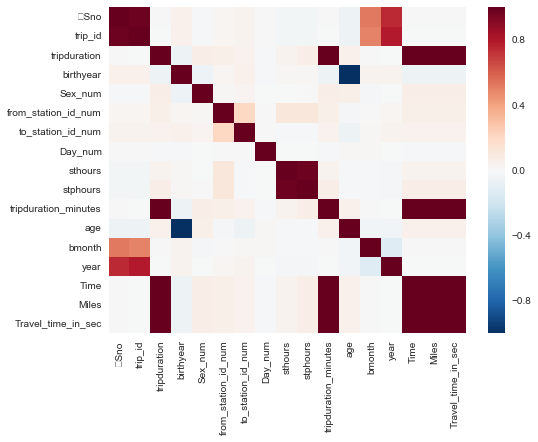

In [26]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(bikes.corr())

## Adding more features to the model

In [41]:
# create a list of features
feature_cols = ['Time', 'Sex_num', 'age', 'tripduration']

In [42]:
# create X and y
X = bikes[feature_cols]
y = bikes.Miles

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

1.00058791832e-05
[  1.20039969e-01  -2.79571051e-06  -1.90009697e-08   4.43293157e-05]


In [43]:
BabyDataSet = list(zip(feature_cols,linreg.coef_))
BabyDataSet

[('Time', 0.12003996930607243),
 ('Sex_num', -2.795710511127746e-06),
 ('age', -1.900096972791509e-08),
 ('tripduration', 4.4329315658967635e-05)]

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Time** is associated with a **Miles increase of 0.12 meters**.

- Holding all other features fixed, a 1 unit increase in **tripduration** is associated with a **Miles increase of 4.43 meters***.

- Holding all other features fixed, a 1 unit increase in **Sex_num** is associated with a **Miles decrease of -2.86 meters***.

- Holding all other features fixed, a 1 unit increase in **age** is associated with a **Miles decrease of -1.64 meters***.


Conclusion:
    
Yes, we can predict distance in miles by using time. For that we have used linear regression and predict miles by supplying 25 minutes. The model predicts that a rider paddle continuously for ***25 minutes***. He/she will cover ***3.0674 miles*** of distance. 
The other factor that effect on distance covered by any rider depend on age, Sex, and time. If we change any of them the distance covered by rider will change.


---------------------------------------------------------------

## Resources
References:*From the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*)

- How to Calculate MPH for Bikes: [How to Calculate MPH for Bikes](https://www.livestrong.com/article/461208-how-to-calculate-mph-for-bikes/)

- Google Map:[Google Map](https://www.google.ie/search?biw=1366&bih=654&ei=J1i1WpGlB9HisAeIvZ2ABg&q=cycle+distance+between+E+Pine+St%2Cseattle%2Cwa+and+Union+St%2Cseattle%2Cwa&oq=cycle+distance+between+E+Pine+St%2Cseattle%2Cwa+and+Union+St%2Cseattle%2Cwa&gs_l=psy-ab.12...76658.91758.0.94744.6.6.0.0.0.0.142.530.5j1.6.0....0...1c.2.64.psy-ab..0.0.0....0.ZzhM5Ksc86U)

- scikit-learn documentation: [Cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html), [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- scikit-learn issue on GitHub: [MSE is negative when returned by cross_val_score](https://github.com/scikit-learn/scikit-learn/issues/2439)
- Section 5.1 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) (11 pages) and related videos: [K-fold and leave-one-out cross-validation](https://www.youtube.com/watch?v=nZAM5OXrktY) (14 minutes), [Cross-validation the right and wrong ways](https://www.youtube.com/watch?v=S06JpVoNaA0) (10 minutes)
- Scott Fortmann-Roe: [Accurately Measuring Model Prediction Error](http://scott.fortmann-roe.com/docs/MeasuringError.html)
- Machine Learning Mastery: [An Introduction to Feature Selection](http://machinelearningmastery.com/an-introduction-to-feature-selection/)
- Harvard CS109: [Cross-Validation: The Right and Wrong Way](https://github.com/cs109/content/blob/master/lec_10_cross_val.ipynb)
- Journal of Cheminformatics: [Cross-validation pitfalls when selecting and assessing regression and classification models](http://www.jcheminf.com/content/pdf/1758-2946-6-10.pdf)